In [1]:
#problem 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv_file='./Salary_Data.csv'
dataset = pd.read_csv(csv_file)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X= dataset.iloc [:,:-1].values
Y= dataset.iloc [: ,1].values

In [5]:
from sklearn. model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=1/3,random_state=0) 

In [6]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

In [7]:
 Y_pred=regressor.predict(X_test)

In [8]:
Y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
print('mean squared error :', mse)

mean squared error : 21026037.329511296


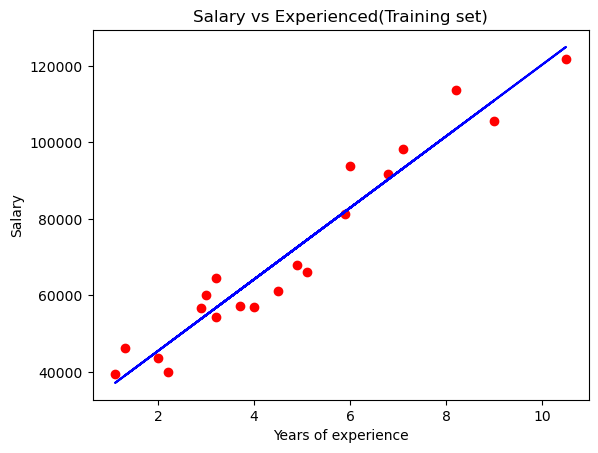

In [10]:
plt.scatter(X_train,Y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experienced(Training set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show() 

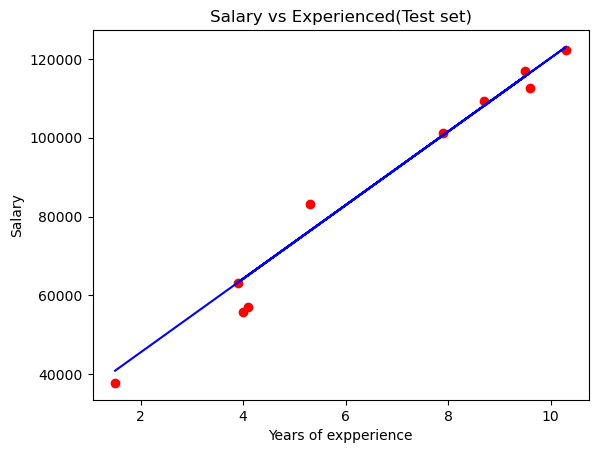

In [11]:
plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.title('Salary vs Experienced(Test set)')
plt.xlabel('Years of expperience')
plt.ylabel('Salary')
plt.show() 

In [12]:
#problem 2

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [14]:
from sklearn.impute import SimpleImputer
dataset = pd.read_csv('K-Mean_Dataset.csv')
x = dataset.iloc[:,1:]
y = dataset.iloc[:,-1]
fill_nan = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_nan = fill_nan.fit(X)
x = fill_nan.transform(X)
print(x.shape, y.shape)
dataset.head(7)

(30, 1) (8950,)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12


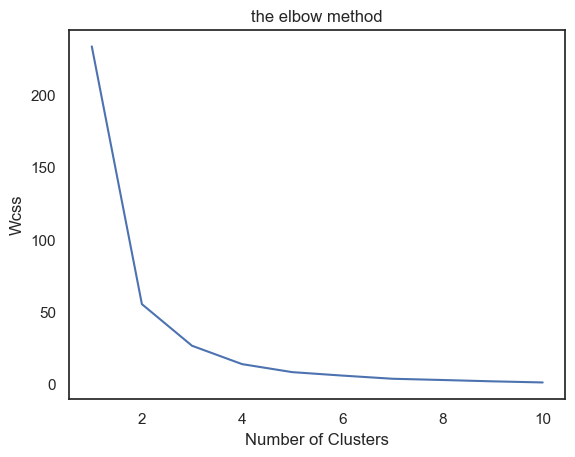

In [15]:
# ##elbow method to know the number of clusters
wcss = []
for i in range(1,11):
     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
     kmeans.fit(x)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [16]:
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=3)

In [17]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5466946829733801


In [18]:
#question3

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_after_scaled = pd.DataFrame(X_scaled_array)


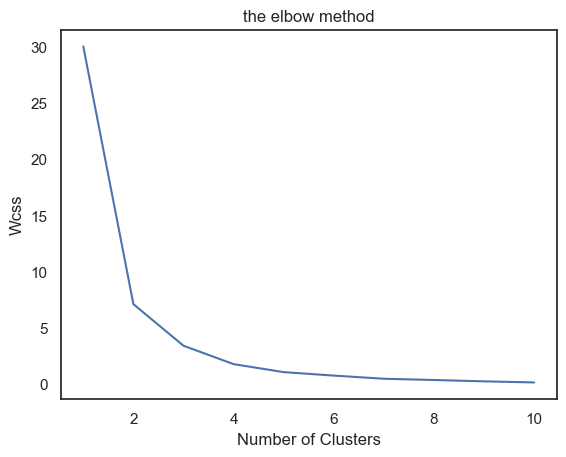

In [20]:
##elbow method to know the number of clusters
wcss = []
for i in range(1,11):
     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
     kmeans.fit(X_after_scaled)
     wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [21]:
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_after_scaled)

KMeans(n_clusters=3)

In [22]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_after_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_after_scaled, y_cluster_kmeans)
print('Silhouette score after scaling:',score)

Silhouette score after scaling: 0.5547430495446872
